In [1]:
import tensorflow as tf

In [5]:
# TensorBoard can visualize the graph
# one node has been created as a
a = tf.add(2,3)
print(a)

Tensor("Add_1:0", shape=(), dtype=int32)


In [6]:
# sess.run would run all the computation before the node to get the final answer
sess = tf.Session()
print(sess.run(a))
sess.close()

5


In [7]:
# A Session object encapsulates the enviroment in which Operation objects are executed, and Tensor objects 
# are evaluated
with tf.Session() as sess:
    print(sess.run(a))

5


In [14]:
# see one graph, it won't calculate the unnecessary operate, that's efficient.
x = 2
y = 3
op1 = tf.add(x,y)
op2 = tf.multiply(x,y)
op3 = tf.pow(op2,op1)
with tf.Session() as sess:
    op3,op2 = sess.run([op3,op1])
    print(op3)

7776


In [ ]:
# pass all variables whose vlaue you want to a list in fetches. 
# tf.Session.run(fetches,feed_dict=None,options=None,run_metadate=None)

In [2]:
# Visualize it with TensorBoard
a = tf.constant(2,name = "a")
b = tf.constant(3,name = "b")
x = tf.add(a,b, name = "add")
writer = tf.summary.FileWriter('./graphs', sess.graph)
writer.close()
with tf.Session() as sess:
    # add this line to use TensorBoard
    print(sess.run(x))
# in cmd: $tensorboard --logdir="./graphs" --port 6006

5


In [6]:
# more constants
#tf.constant(value,dtype=None,shape=None,name='Const',verify_shape=False)
a = tf.constant(2,shape=[2,2],verify_shape=False)

In [9]:
# because of the shape, it will replicate the last value
tf.InteractiveSession()
a.eval()

array([[2, 2],
       [2, 2]], dtype=int32)

In [10]:
b = tf.constant([2,1],shape=[3,3])
b.eval()

array([[2, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [15]:
a = tf.constant([2,2],name="a")
b = tf.constant([[0,1],[2,3]],name="b")
x = tf.add(a,b,name = "add")
x.eval()

array([[2, 3],
       [4, 5]], dtype=int32)

In [17]:
y = tf.multiply(a,b,name="mul")
y.eval()

array([[0, 2],
       [4, 6]], dtype=int32)

In [19]:
# tensors filled with a specific value
#tf.zeros(shape,dtype=tf.float32,name=None)
tf.zeros([2,3],dtype=tf.float32,name=None)
tf.ones([2,3],dtype=tf.float32,name=None)
#preferable
tf.zeros_like(input_tensor,dtype=None,name=None,optimize=True)
tf.ones_like(input_tensor,dtype=None,name=None,optimize=True)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]], dtype=float32)

In [20]:
#tf.fill(dims,vale,name=None)
tf.fill([2,3],8).eval()

array([[8, 8, 8],
       [8, 8, 8]], dtype=int32)

In [23]:
# Constants as sequences
#tf.linspace(start,stop,num,name=None)
tf.linspace(10.0,13.0,4).eval()

array([ 10.,  11.,  12.,  13.], dtype=float32)

In [26]:
#tf.range(start,limit=None,delta=1,dtype=None,name='range')
tf.range(3,19,4).eval()

array([ 3,  7, 11, 15], dtype=int32)

In [27]:
# Randomly Generated Constants
#tf.random_normal(shape,mean=0.0,stddev=1.0,dtype=tf.float32,seed=None,name=None)
#tf.truncated_normal
#tf.random_uniform
#tf.random_shuffle (shuffle only for the first dimension, useful in batch)
a =tf.constant([[2,1],[2,2],[3,3]])
tf.random_shuffle(a).eval()
#tf.multinomial()
#tf.random_gamma
#tf.set_random_seed(seed)

array([[2, 2],
       [3, 3],
       [2, 1]], dtype=int32)

In [ ]:
#from this we could see constant take too much memory
my_const = tf.constant([1,2],name="my_const")
with tf.Session() as sess:
    print(sess.graph.as_graph_def())

In [38]:
# Varialbes
a = tf.Variable(2,name="scalar")
b = tf.Variable([2,3],name="vector")
# 784*10 tensor, fill with zero
c = tf.Variable(tf.zeros([784,10]))

In [43]:
init = tf.global_variables_initializer()
init_ab = tf.variables_initializer([a,b],name="init_ab")
with tf.Session() as sess:
    sess.run(init)
    print(a.eval())

2


In [50]:
# you don't need to initialize variable because assign_op did it for you
# each session maintains its own copy of varialbe
W = tf.Variable(10)
assign_op = W.assign(100)
with tf.Session() as sess:
    sess.run(assign_op)
    print(W.eval())

100


In [54]:
# Placeholders
# TF program often has 2 phases: Assemble a graph, Use a session to execute operations in the grapg.
# TF could assemble the graph first without knowing the values needed for computatuion
#tf.placeholder(dtype,shape=None,name=None)
a = tf.placeholder(tf.float32,shape=[3])
b = tf.constant([5,5,5],tf.float32)
c = a + b

with tf.Session() as sess:
    #feed [1,2,3] to placeholder a via dict {a:[1,2,3]}
    print(sess.run(c,{a:[1,2,3]})) #the tensor a is the key, not str 'a'

[ 6.  7.  8.]


In [ ]:
# what if want to feed multiple data points in
with tf.Session() as sess:
    for a_value in list_of_values_for_a:
        print(sess.run(c,{a:a_value}))

In [125]:
# order is important
a = tf.add(2,5)
c = tf.constant(2)
b = tf.multiply(a,c)
with tf.Session() as sess:
    replace_dict = {a:5,c:5}
    print(sess.run(b,feed_dict=replace_dict))

25


In [139]:
x = [3.8148,4.4299,4.8348,4.7097,4.3744,6.2462,6.1928,8.598,10.9355,12.8651,13.241,11.4441,11.4934,11.6549,12.3714,14.9091,15.1472]
y = [8.2584,8.1836,9.2867,9.9768,11.0848,11.3224,13.1264,13.2827,15.2794,15.3178,15.466,13.0041,16.4752,15.5564,16.0581,16.7853,15.9257]

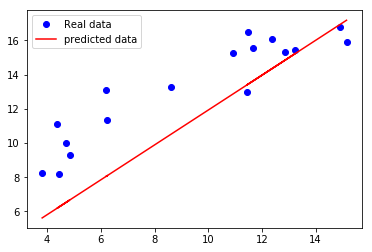

In [183]:
data = [list(a) for a in zip(x, y)]
X = tf.placeholder(tf.float32,name="X")
Y = tf.placeholder(tf.float32,name="Y")
w = tf.Variable(0.0, name = 'weights')
b = tf.Variable(0.0, name = 'bias')
Y_predict = X * w + b
lose = tf.square(Y-Y_predict,name="lose")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(lose)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    #sess.run(tf.summary.FileWriter("./my_linear",sess.graph))
    sess.run(init)
    for i in range(50): # train the model 100 times
        total_lose=0
        #feed_dict={X:train_x,Y:train_y}
        for x1,y1 in data:
            _,l = sess.run([optimizer,lose],feed_dict={X:x1,Y:y1})
            total_lose += l
        #print('Epoch {0}:{1}'.format(i,total_lose/17.0))
    #writer.close()
    
    w_value,b_value = sess.run([w,b])

import matplotlib.pyplot as plt
%matplotlib inline
X, Y = x, y
plt.plot(X,Y,'bo',label='Real data')
plt.plot(X,[x * w_value + b_value for x in X],'r',label='predicted data')
plt.legend()
plt.show()

In [193]:
#Another Version: reduce_mean
data = [list(a) for a in zip(x, y)]
X = tf.placeholder(tf.float32,name="X")
Y = tf.placeholder(tf.float32,name="Y")
w = tf.Variable(0.0, name = 'weights')
b = tf.Variable(0.0, name = 'bias')
Y_predict = X * w + b
lose = tf.reduce_mean(tf.square(Y-Y_predict))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(lose)
init = tf.global_variables_initializer()
lose_history = np.empty(shape=[1],dtype=float)
with tf.Session() as sess:
    #sess.run(tf.summary.FileWriter("./my_linear",sess.graph))
    sess.run(init)
    for i in range(50): # train the model 100 times
        total_lose=0
        #feed_dict={X:train_x,Y:train_y}

        sess.run(optimizer,feed_dict={X:x,Y:y})
        lose_history = np.append(lose_history,sess.run(lose,feed_dict={X: x,Y: y}))
        #print('Epoch {0}:{1}'.format(i,total_lose/17.0))
    #writer.close()
    
    w_value,b_value = sess.run([w,b])
    
plt.plot(range(len(lose_history)),lose_history)
plt.axis([0,50,0,np.max(lose_history)])
plt.show()


In [ ]:
# Implementing Huber Loss